<a href="https://www.kaggle.com/code/cetturion/educmm-lab1?scriptVersionId=227617036" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Лабораторная работа №1 (интерполяция полиномами)

## Базовые функции

In [1]:
import numpy as np

def f(t):
    return np.exp(-t**2)

def nodes_mulitiply(x, t_nodes):
    return np.prod(x - t_nodes)

def factorial(n):
    if n == 0:
        return 1
    else:
        return n * factorial(n-1)

def chebyshev(a, b, k):
    chebyshev = np.zeros(k, dtype=float)
    for m in range(1, k + 1):
        chebyshev[m-1] = (a + b)/2 + (b - a)/2 * np.cos((2*m - 1)/(2*k) * np.pi)
    return chebyshev

## Производная $n$-ой степени в точке $t$

In [2]:
import numpy as np

def get_derivative(n, t):
    a = np.zeros((n+1, n+1), dtype=float)
    a[0, 0] = 1
    
    for j in range(1, n+1):
        for i in range(n+1):
            if i+1 <= n:
                term1 = (i+1) * a[j-1, i+1]
            else:
                term1 = 0
            
            if i-1 >= 0:
                term2 = -2 * a[j-1, i-1]
            else:
                term2 = 0
            
            a[j, i] = term1 + term2
    
    P_n = np.polyval(a[n, ::-1], t)
    nth_derivative = P_n * np.exp(-t**2)
    return nth_derivative

## Базисный полином Лагранжа (1)

In [3]:
def l_i(i, x, t_nodes):
    return np.prod((x - t_nodes[t_nodes != t_nodes[i]]) / (t_nodes[i] - t_nodes[t_nodes != t_nodes[i]]))

## Интерполяционный полином Лагранжа (2)

In [4]:
def L(x, t_nodes, f_nodes):
    n = len(t_nodes)

    basis = np.array([l_i(i, x, t_nodes) for i in range(n)])
    return np.sum(np.multiply(basis, f_nodes))

## Курс валюты (3)

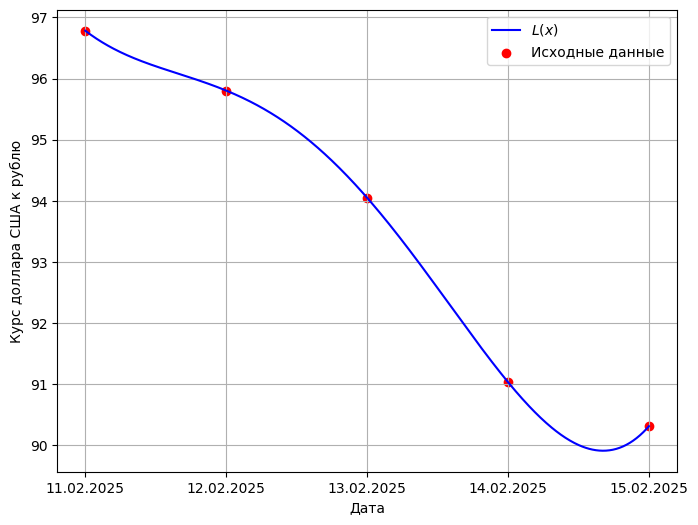

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from datetime import datetime

url = "https://www.cbr.ru/scripts/XML_dynamic.asp?date_req1=11/02/2025&date_req2=15/02/2025&VAL_NM_RQ=R01235"
output = pd.read_xml(url)
dates_str = output['Date'].values
rates = output['Value'].str.replace(',', '.').astype(float)

dates = [datetime.strptime(date, '%d.%m.%Y') for date in dates_str]
x_nodes = np.array(dates)
y_nodes = np.array(rates)

x_interp = np.linspace(mdates.date2num(x_nodes[0]), mdates.date2num(x_nodes[-1]), 500)
y_interp = np.array([L(x, mdates.date2num(x_nodes), y_nodes) for x in x_interp])

x_interp_dates = mdates.num2date(x_interp)

plt.figure(figsize=(8, 6))
plt.plot(x_interp_dates, y_interp, label="$L(x)$", color="blue")
plt.scatter(x_nodes, y_nodes, color="red", label="Исходные данные")

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d.%m.%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())

plt.xlabel("Дата")
plt.ylabel("Курс доллара США к рублю")
plt.legend()
plt.grid(True)
plt.savefig("lagrange_interpolation_cb.png", dpi=300)
plt.show()

## Интерполяция Лагранжа с равномерно распределёнными узлами (4.1)

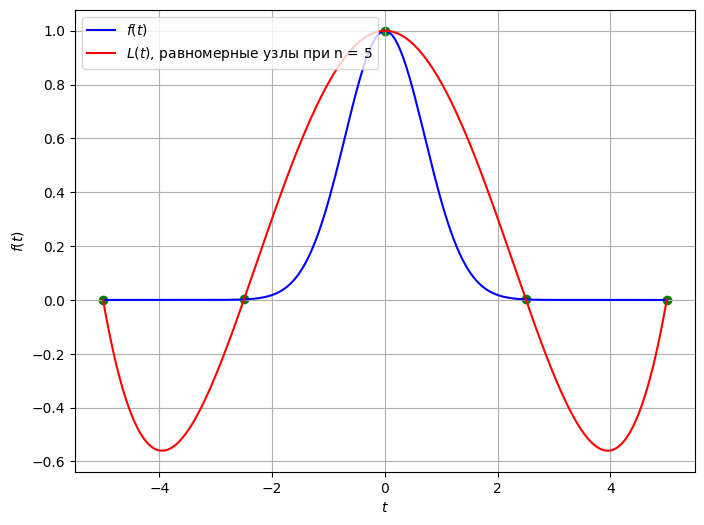

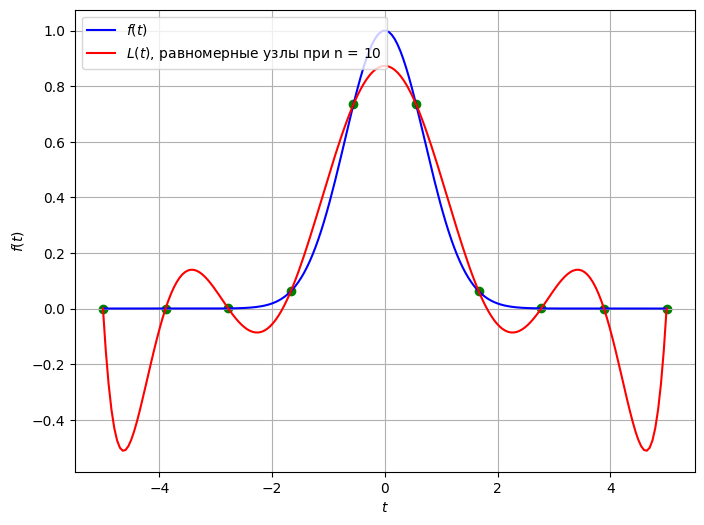

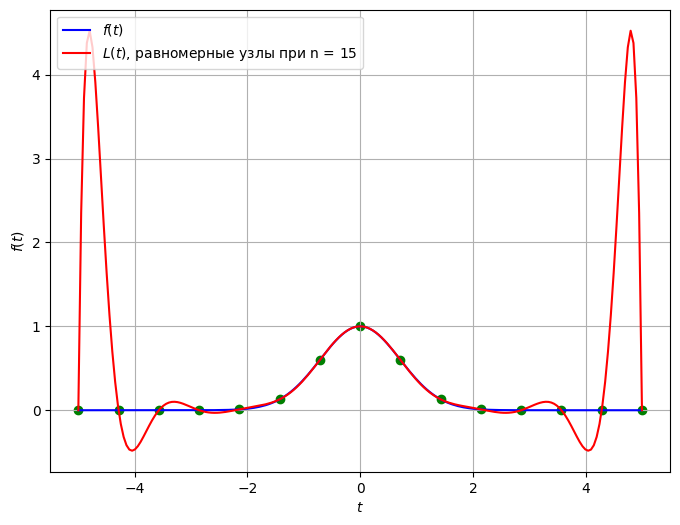

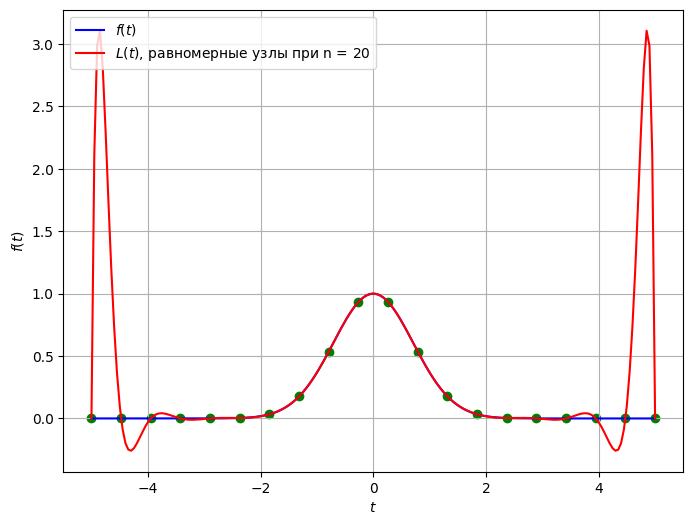

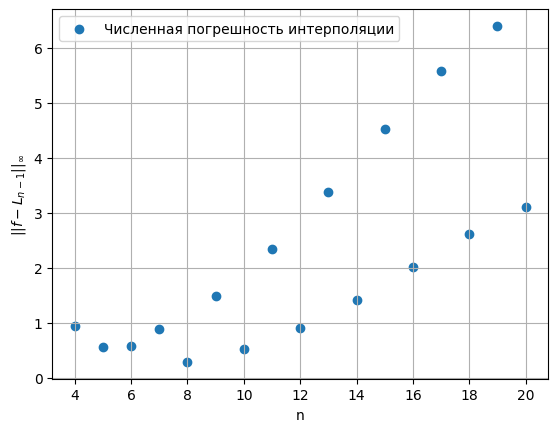

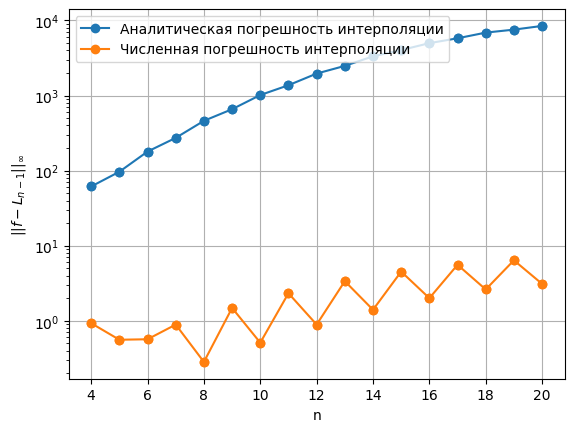

In [6]:
import numpy as np
import matplotlib.pyplot as plt

dlt_uniform = np.array([])
uniform_borders = np.array([])
for num_nodes in range(4, 21):
    #print(f"Количество узлов интерполяции: {num_nodes}")

    t_values = np.linspace(-5, 5, 200)
    f_values = f(t_values)

    t_nodes = np.linspace(-5, 5, num_nodes)
    f_nodes = f(t_nodes)
        
    interpolated_values = [L(t, t_nodes, f_nodes) for t in t_values]  # Значения интерполяционного многочлена

    if num_nodes in [5, 10, 15, 20]:
        plt.figure(figsize=(8, 6))
        plt.plot(t_values, f_values, label="$f(t)$", color="blue")
        plt.plot(t_values, interpolated_values, label=f"$L(t)$, равномерные узлы при n = {num_nodes}", color="red")
        plt.scatter(t_nodes, f_nodes, color="green")  # Отмечаем узлы
        plt.xlabel("$t$")
        plt.ylabel("$f(t)$")
        plt.legend(loc='upper left')
        plt.grid(True)
        plt.savefig(f"uniform-{num_nodes}.png", dpi=300)
        plt.show()

    delta = np.abs(f_values - interpolated_values)
    supremum = np.max(delta)
    dlt_uniform = np.append(dlt_uniform, supremum)
    #print(f"Расстояние между функциями - {supremum}")

    max_derivative = float('-inf')
    max_multiply = float('-inf')
    
    for t in t_values:
        derivative = np.abs(get_derivative(num_nodes, t))
        tmp = np.abs(nodes_mulitiply(t, t_nodes))
        
        if derivative > max_derivative:
            max_derivative = derivative
        if tmp > max_multiply:
            max_multiply = tmp
            
    upper_bound = max_derivative/factorial(num_nodes) * max_multiply
    uniform_borders = np.append(uniform_borders, upper_bound)
    #print(f"Итоговая верхняя граница погрешности - {upper_bound}\n")

# График зависимости расстояния от числа узлов
plt.scatter(range(4, 21), dlt_uniform, label='Численная погрешность интерполяции')
plt.xlabel("n")
plt.ylabel("$|| f - L_{n-1} ||_\infty$")
plt.grid(True)
plt.legend()
plt.savefig("uniform.png", dpi=300)
plt.show()
    

plt.semilogy(range(4, 21), uniform_borders, '-o', label='Аналитическая погрешность интерполяции')
plt.scatter(range(4, 21), uniform_borders)
plt.semilogy(range(4, 21), dlt_uniform, '-o', label='Численная погрешность интерполяции')
plt.scatter(range(4, 21), dlt_uniform)
plt.grid(True)
plt.legend(loc='upper left')
plt.xlabel("n")
plt.ylabel("$|| f - L_{n-1} ||_\infty$")
plt.savefig("uniform_borders_log.png", dpi=300)
plt.show()

## Интерполяция Лагранжа при оптимальном распределении узлов (5.1)

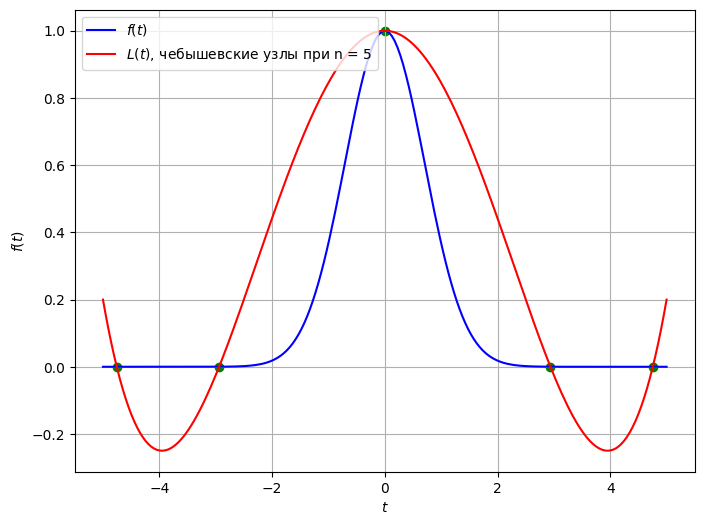

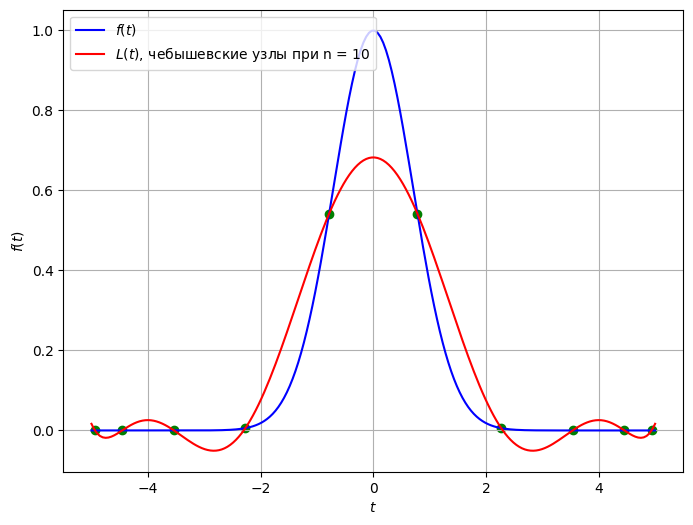

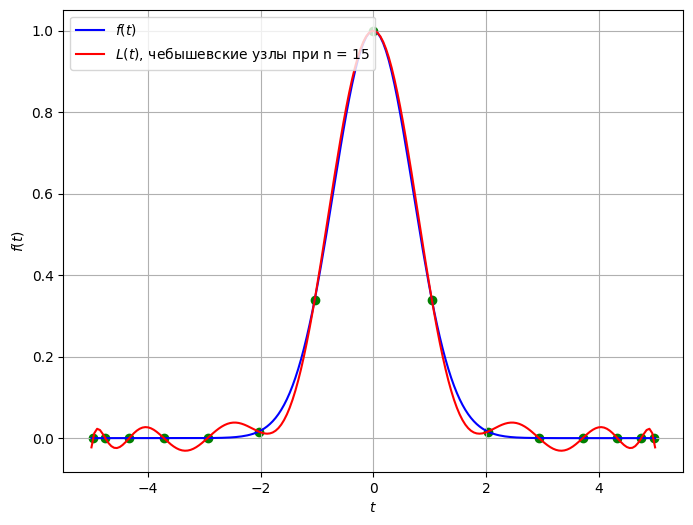

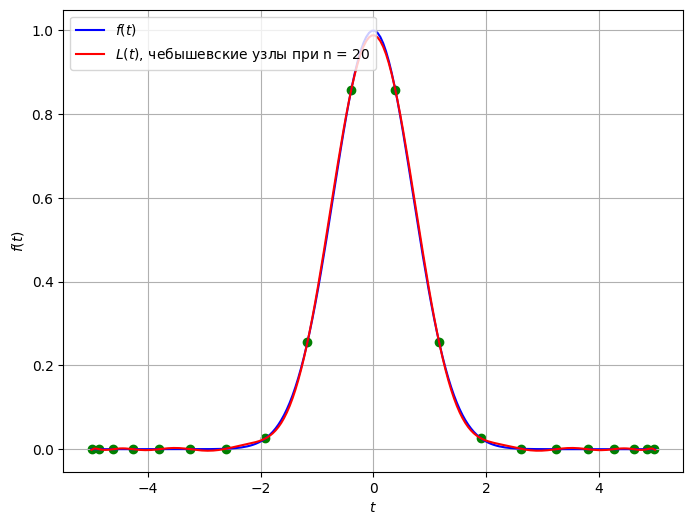

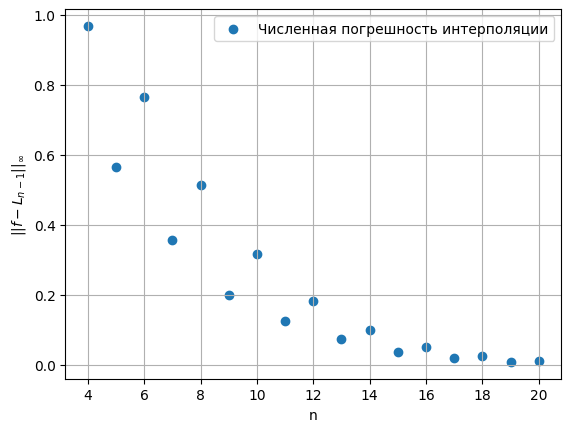

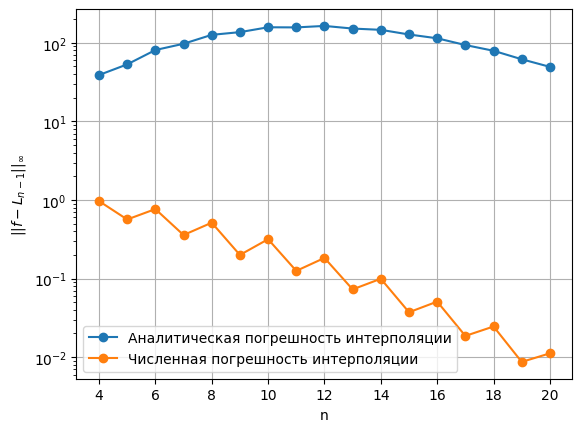

In [7]:
import numpy as np
import matplotlib.pyplot as plt

dlt_chebyshev = np.array([])
borders_chebyshev = np.array([])
for num_nodes in range(4, 21):
    #print(f"Количество узлов интерполяции: {num_nodes}")
    
    t_values = np.linspace(-5, 5, 200)
    f_values = f(t_values)
    
    t_nodes = chebyshev(-5, 5, num_nodes)
    f_nodes = f(t_nodes)
    
    interpolated_values = [L(t, t_nodes, f_nodes) for t in t_values]
    
    if num_nodes in [5, 10, 15, 20]:
        plt.figure(figsize=(8, 6))
        plt.plot(t_values, f_values, label="$f(t)$", color="blue")
        plt.grid(True)
        plt.plot(t_values, interpolated_values, label=f"$L(t)$, чебышевские узлы при n = {num_nodes}", color="red")
        plt.scatter(t_nodes, f_nodes, color="green")  # Отмечаем узлы
        plt.xlabel("$t$")
        plt.ylabel("$f(t)$")
        plt.legend(loc='upper left')
        plt.savefig(f"chebyshev-{num_nodes}.png", dpi=300)
        plt.show()
    
    delta = np.abs(f_values - interpolated_values)
    supremum = np.max(delta)
    dlt_chebyshev = np.append(dlt_chebyshev, supremum)
    #print(f"Расстояние между функциями - {supremum}")
    
    max_derivative = float('-inf')
    
    for t in t_values:
        derivative = np.abs(get_derivative(num_nodes, t))
        if derivative > max_derivative:
            max_derivative = derivative
    upper_bound = max_derivative*(10**num_nodes)/(2**(2*num_nodes - 1)*factorial(num_nodes))
    borders_chebyshev = np.append(borders_chebyshev, upper_bound)
    #print(f"Итоговая верхняя граница погрешности - {upper_bound}\n")

# График зависимости расстояния от числа узлов
plt.scatter(range(4, 21), dlt_chebyshev, label='Численная погрешность интерполяции')
plt.xlabel("n")
plt.ylabel("$|| f - L_{n-1} ||_\infty$")
plt.grid(True)
plt.legend()
plt.savefig("chebyshev.png", dpi=300)
plt.show()

plt.semilogy(range(4, 21), borders_chebyshev, '-o', label='Аналитическая погрешность интерполяции')
plt.semilogy(range(4, 21), dlt_chebyshev, '-o', label='Численная погрешность интерполяции')
plt.grid(True)
plt.legend(loc='lower left')
plt.xlabel("n")
plt.ylabel("$|| f - L_{n-1} ||_\infty$")
plt.savefig("chebyshev_borders_log.png", dpi=300)
plt.show()

## Кусочно-линейная интерполяция (5.2)

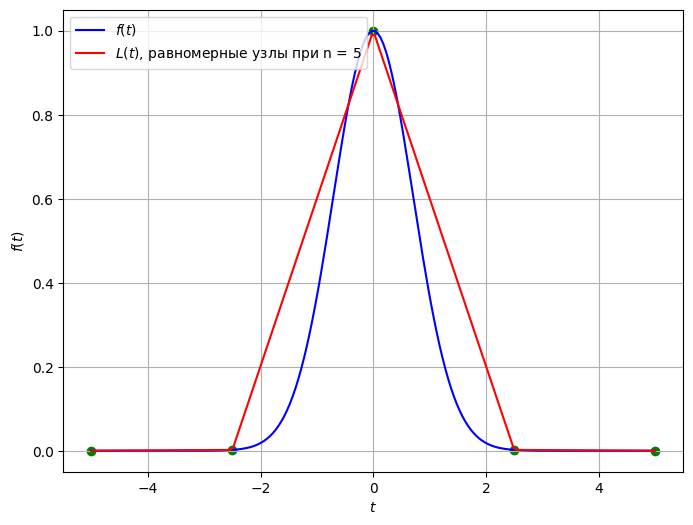

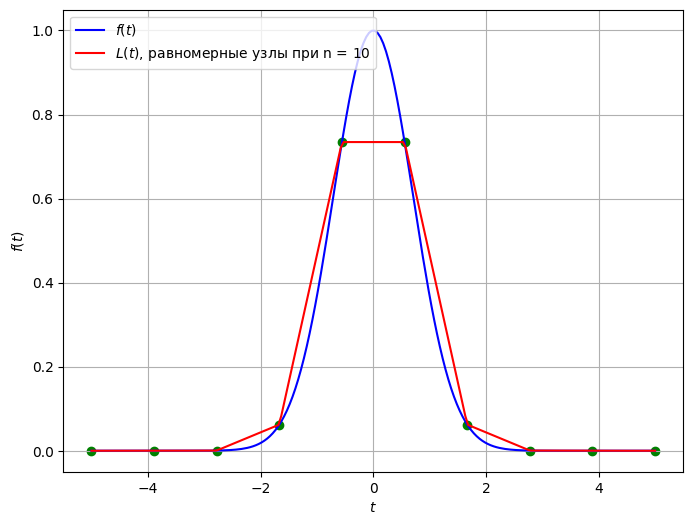

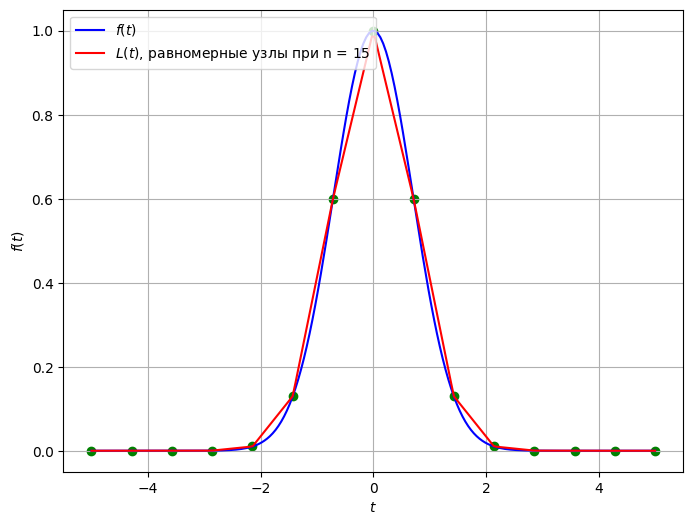

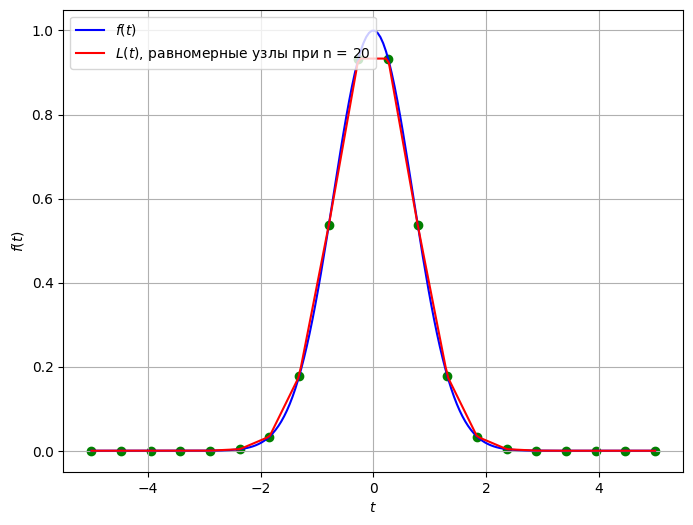

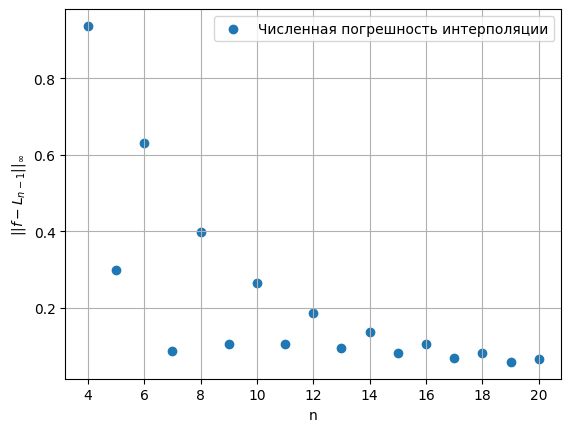

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def piecewise_linear_interpolation(x, t_nodes, f_nodes):

    i = np.searchsorted(t_nodes, x) - 1
    i = max(i, 0)
    i = min(i, len(t_nodes) - 2)
    
    x0, x1 = t_nodes[i], t_nodes[i + 1]
    y0, y1 = f_nodes[i], f_nodes[i + 1]
    return y0 + (y1 - y0) / (x1 - x0) * (x - x0)

# Основная программа
dlt_piecewise = np.array([])
for num_nodes in range(4, 21):
    #print(f"Количество узлов интерполяции: {num_nodes}")
    
    t_values = np.linspace(-5, 5, 200)
    f_values = f(t_values)
    
    t_nodes = np.linspace(-5, 5, num_nodes)
    f_nodes = f(t_nodes)
    
    interpolated_values = [piecewise_linear_interpolation(t, t_nodes, f_nodes) for t in t_values]

    if num_nodes in [5, 10, 15, 20]:
        plt.figure(figsize=(8, 6))
        plt.plot(t_values, f_values, label="$f(t)$", color="blue")
        plt.plot(t_values, interpolated_values, label=f"$L(t)$, равномерные узлы при n = {num_nodes}", color="red")
        plt.scatter(t_nodes, f_nodes, color="green")
        plt.xlabel("$t$")
        plt.ylabel("$f(t)$")
        plt.legend(loc='upper left')
        plt.grid(True)
        plt.savefig(f"piecewise-{num_nodes}.png", dpi=300)
        plt.show()
    
    delta = np.abs(f_values - interpolated_values)
    supremum = np.max(delta)
    dlt_piecewise = np.append(dlt_piecewise, supremum)
    #print(f"Расстояние между функциями - {supremum}\n")

plt.scatter(range(4, 21), dlt_piecewise, label='Численная погрешность интерполяции')
plt.xlabel("n")
plt.ylabel("$|| f - L_{n-1} ||_\infty$")
plt.grid(True)
plt.legend()
plt.savefig("piecewise_border.png", dpi=300)
plt.show()

## Сравнение численных погрешностей (6)

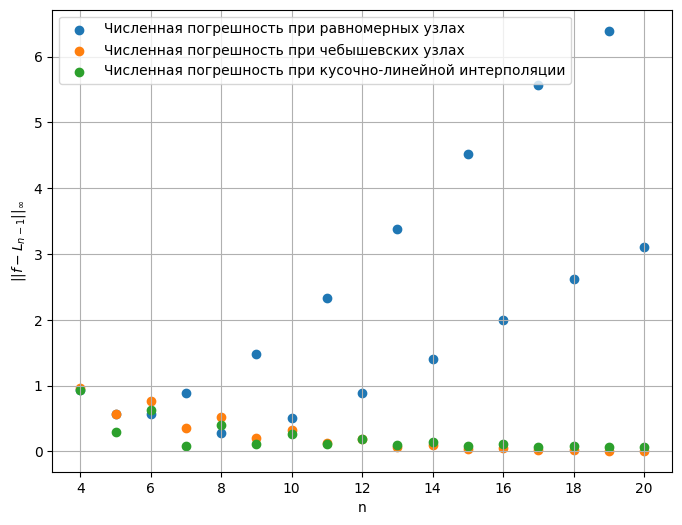

In [9]:

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 6))
plt.scatter(np.arange(4, 21), dlt_uniform, label='Численная погрешность при равномерных узлах')
plt.scatter(np.arange(4, 21), dlt_chebyshev, label='Численная погрешность при чебышевских узлах')
plt.scatter(np.arange(4, 21), dlt_piecewise, label='Численная погрешность при кусочно-линейной интерполяции')
plt.xlabel('n')
plt.ylabel('$ || f - L_{n-1} ||_\infty $')
plt.legend()
plt.grid(True)
plt.savefig('errors.png')
plt.show()


## Аппроксимация функции ошибок при $x=1$ (7)

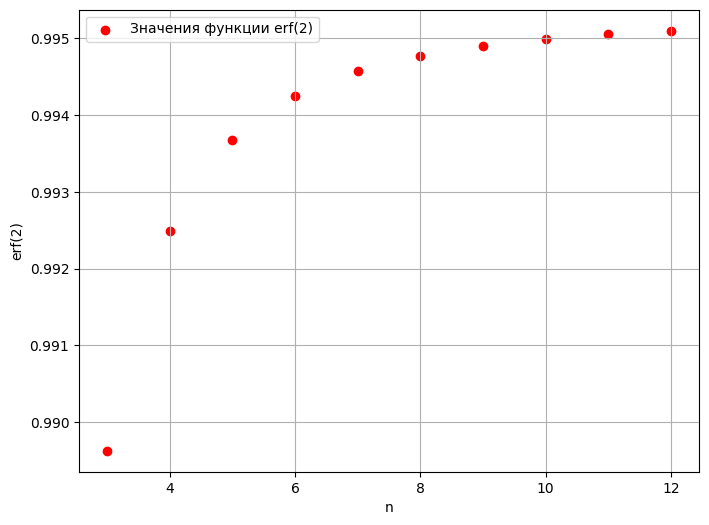

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def trapezoidal_rule(n, a, b):
    t_nodes = np.linspace(a, b, n)
    f_nodes = f(t_nodes)
    integral = 0.0
    for i in range(n-1):
        integral += (f_nodes[i+1] + f_nodes[i]) * (t_nodes[i+1] - t_nodes[i]) / 2
    return integral

def erf_approx(n, x):
    t_nodes = np.linspace(0, x, n)
    f_nodes = np.exp(-t_nodes**2)
    integral = 0.0
    
    for i in range(n-1):
        integral += (f_nodes[i+1] + f_nodes[i]) * (t_nodes[i+1] - t_nodes[i]) / 2
    return (2 / np.sqrt(np.pi)) * integral

x = 2
n_values = [i for i in range(3, 13)]
erf_values = [erf_approx(n, x) for n in n_values]

plt.figure(figsize=(8, 6))
plt.scatter(n_values, erf_values, color='red', label='Значения функции erf(2)')
plt.xlabel('n')
plt.ylabel('erf(2)')
plt.grid(True)
plt.legend(loc='upper left')
plt.savefig('erf.png', dpi=300)
plt.show()

## Оптимизация вычисления полинома Лагранжа (9)

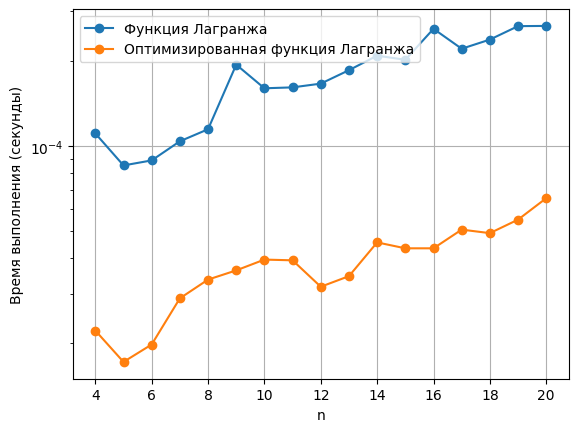

In [11]:
import numpy as np
import time
import matplotlib.pyplot as plt

def compute_barycentric_weights(x_nodes):
    n = len(x_nodes)
    w = np.ones(n)
    for i in range(n):
        for j in range(n):
            if i != j:
                w[i] /= (x_nodes[i] - x_nodes[j])
    return w

def optimize_lagrange(x_nodes, y_nodes, w, x):
    numerator = 0
    denominator = 0
    for i in range(len(x_nodes)):
        if x == x_nodes[i]:
            return y_nodes[i]
        diff = x - x_nodes[i]
        numerator += w[i] * y_nodes[i] / diff
        denominator += w[i] / diff
    return numerator / denominator

lagrange_times = np.array([])
optimize_lagrange_times = np.array([])

for n in range(4, 21):
    x_nodes = np.linspace(-5, 5, n)
    y_nodes = np.array([f(x) for x in x_nodes])
    w = compute_barycentric_weights(x_nodes)

    x = 2.5  # Точка, в которой вычисляем значение полинома

    start_time = time.time()
    res2 = L(x, x_nodes, y_nodes)
    end_time = time.time()
    time_for_L = end_time - start_time
    lagrange_times = np.append(lagrange_times, time_for_L)
    #print(f"Time for L function: {time_for_L} seconds")

    start_time = time.time()
    result = optimize_lagrange(x_nodes, y_nodes, w, x)
    end_time = time.time()
    time_for_optimize_lagrange = end_time - start_time
    optimize_lagrange_times = np.append(optimize_lagrange_times, time_for_optimize_lagrange)
    #print(f"Time for optimize_lagrange function: {time_for_optimize_lagrange} seconds")

plt.semilogy(range(4, 21), lagrange_times, 'o-', label='Функция Лагранжа')
plt.semilogy(range(4, 21), optimize_lagrange_times, 'o-', label='Оптимизированная функция Лагранжа')
plt.xlabel('n')
plt.ylabel('Время выполнения (секунды)')
plt.legend(loc='upper left')
plt.grid(True)
plt.savefig('lagrange_times.png')
plt.show()